In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\lenovo\\Datathon'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\lenovo\Datathon\sample_submission.csv
C:\Users\lenovo\Datathon\submission.csv
C:\Users\lenovo\Datathon\test.csv
C:\Users\lenovo\Datathon\train.csv
C:\Users\lenovo\Datathon\Untitled.ipynb
C:\Users\lenovo\Datathon\xgb_submission.csv
C:\Users\lenovo\Datathon\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [3]:
train_df = pd.read_csv("C:\\Users\\lenovo\\Datathon\\train.csv")

In [4]:
test_df = pd.read_csv("C:\\Users\\lenovo\\Datathon\\test.csv")

In [5]:
train_df.head()

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
0,eac9059b997a667954a1c2f19079c463,NaN,36 months,0.0,91th week,UT,130000.0,INDIVIDUAL,BAT3016651,0.0,...,D2,Debt consolidation,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,841xx,28.0
1,f2bdbfe82b2a63a35726cb1a630af56a,NaN,36 months,0.0,4th week,LA,50000.0,INDIVIDUAL,BAT1184694,0.0,...,D2,Business,138.0,115674.0,11.84,0.0,49000.0,Verified,701xx,39.0
2,0a73ee5d7841b012f1fb62542d7664c7,NaN,36 months,0.0,65th week,VA,40000.0,INDIVIDUAL,BAT2078974,0.0,...,C1,Debt consolidation,0.0,40075.0,1689.09,0.0,17600.0,Verified,241xx,29.0
3,d9a39c969e294fe16601279e114fc9c0,< 1 year,60 months,0.0,9th week,MI,50000.0,INDIVIDUAL,BAT4106493,0.0,...,F2,Credit card refinancing,0.0,20459.0,348.68,0.0,20100.0,Source Verified,480xx,15.0
4,3a44d3ab14792dcc7aaf391db0bdb72c,5 years,36 months,0.0,139th week,NC,45000.0,INDIVIDUAL,,0.0,...,B5,debt consolidation,0.0,100987.0,2164.96,0.0,15000.0,Verified,282xx,18.0


In [6]:
test_df

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36
0,2183e7e6f5901c2fe2bc14ca6d43a6fa,6 years,36 months,0.0,22th week,CA,42000.0,INDIVIDUAL,,0.0,...,79.4,C4,Credit card refinancing,0.0,16261.0,548.59,0.0,20000.0,Not Verified,900xx
1,a495f8f7ec5a034c6db1405b40c7f473,5 years,36 months,0.0,48th week,WI,52000.0,INDIVIDUAL,BAT4729018,0.0,...,27.5,A2,Credit card refinancing,0.0,124771.0,988.83,0.0,78000.0,Not Verified,549xx
2,c57ccaed44245b3b7eaa76c5ec99a0ea,10+ years,36 months,0.0,35th week,NY,125000.0,INDIVIDUAL,BAT1184694,0.0,...,51.6,A5,Debt consolidation,0.0,409247.0,1177.84,0.0,68500.0,Source Verified,111xx
3,f19d65cf813f5ddbdefa6075278c1d41,1 year,36 months,0.0,9th week,OH,81832.0,INDIVIDUAL,,0.0,...,40.9,B5,Debt consolidation,109.0,476699.0,211.79,0.0,62200.0,Source Verified,430xx
4,5aaec38f837a17c42fab041c2c6b5a4f,10+ years,36 months,0.0,31th week,PA,95000.0,INDIVIDUAL,BAT422167,0.0,...,34.7,B2,Debt consolidation,0.0,126652.0,1471.29,0.0,100000.0,Source Verified,190xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225632,c2d12c317da392b4c805a5267accf5bf,10+ years,60 months,0.0,65th week,CA,56000.0,INDIVIDUAL,BAT2078974,0.0,...,60.7,E4,Credit card refinancing,413.0,19180.0,4868.41,0.0,31100.0,Source Verified,957xx
225633,ce24f3311881d184c48c4ed2d7be96c1,NaN,36 months,0.0,NAth week,CT,34068.0,INDIVIDUAL,BAT6004464,0.0,...,10.4,A1,Credit card refinancing,0.0,145777.0,0.00,0.0,66400.0,Not Verified,060xx
225634,11b58c759028d0b32695224533b47e5b,2 years,36 months,0.0,9th week,NY,145000.0,INDIVIDUAL,NaN,0.0,...,35.4,A2,Credit card refinancing,0.0,27182.0,158.74,0.0,31200.0,Source Verified,112xx
225635,d1cff3f77d9bce11001f3c7a93a9a2c2,10+ years,60 months,0.0,83th week,LA,42000.0,INDIVIDUAL,,0.0,...,30.4,F2,Home improvement,0.0,100717.0,5821.35,0.0,20000.0,Source Verified,712xx


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419040 entries, 0 to 419039
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          419040 non-null  object 
 1   time        397052 non-null  object 
 2   duration    419040 non-null  object 
 3   feature_0   419040 non-null  float64
 4   checkpoint  419040 non-null  object 
 5   feature_1   419040 non-null  object 
 6   feature_2   419040 non-null  float64
 7   feature_3   419040 non-null  object 
 8   feature_4   357082 non-null  object 
 9   feature_5   419040 non-null  float64
 10  feature_6   419040 non-null  float64
 11  feature_7   419040 non-null  float64
 12  feature_8   419040 non-null  float64
 13  feature_9   394776 non-null  object 
 14  feature_10  419040 non-null  int64  
 15  feature_11  419040 non-null  float64
 16  feature_12  419040 non-null  object 
 17  feature_13  419040 non-null  object 
 18  feature_14  419040 non-null  object 
 19  fe

In [8]:
train_df.isna().sum()

id                 0
time           21988
duration           0
feature_0          0
checkpoint         0
feature_1          0
feature_2          0
feature_3          0
feature_4      61958
feature_5          0
feature_6          0
feature_7          0
feature_8          0
feature_9      24264
feature_10         0
feature_11         0
feature_12         0
feature_13         0
feature_14         0
feature_15         0
feature_16         0
feature_17         0
feature_18         0
feature_19    209864
feature_20    305590
feature_21    350775
feature_22         0
feature_23         0
feature_24         0
feature_25         0
feature_26         0
feature_27       183
feature_28         0
feature_29        66
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
target             0
dtype: int64

In [9]:
train_df["time"].unique()

array([nan, '< 1 year', '5 years', '8 years', '3 years', '10+ years',
       '1 year', '2 years', '9 years', '7 years', '4 years', '6 years'],
      dtype=object)

In [10]:
train_df["time"].fillna(train_df["time"].mode().values[0], inplace=True)

In [11]:
train_df.drop("feature_4", axis=1, inplace=True)

In [12]:
train_df["feature_9"].fillna(train_df["feature_9"].mode().values[0], inplace=True)

In [13]:
train_df["feature_19"].fillna(train_df["feature_19"].median(), inplace=True)

In [14]:
train_df["feature_20"].fillna(train_df["feature_20"].median(), inplace=True)

In [15]:
train_df["feature_21"].fillna(train_df["feature_21"].median(), inplace=True)

In [16]:
train_df["feature_27"].fillna(train_df["feature_27"].median(), inplace=True)

In [17]:
train_df["feature_29"].fillna(train_df["feature_29"].mode().values[0], inplace=True)

In [18]:
train_df.isna().sum()

id            0
time          0
duration      0
feature_0     0
checkpoint    0
feature_1     0
feature_2     0
feature_3     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
target        0
dtype: int64

In [19]:
test_df.isna().sum()

id                 0
time           11783
duration           0
feature_0          0
checkpoint         0
feature_1          0
feature_2          0
feature_3          0
feature_4      33172
feature_5          0
feature_6          0
feature_7          0
feature_8          0
feature_9      12976
feature_10         0
feature_11         0
feature_12         0
feature_13         0
feature_14         0
feature_15         0
feature_16         0
feature_17         0
feature_18         0
feature_19    112903
feature_20    164128
feature_21    189150
feature_22         0
feature_23         0
feature_24         0
feature_25         0
feature_26         0
feature_27       120
feature_28         0
feature_29        43
feature_30         0
feature_31         0
feature_32         0
feature_33         0
feature_34         0
feature_35         0
feature_36         0
dtype: int64

In [20]:
test_df["time"].fillna(test_df["time"].mode().values[0], inplace=True)


In [21]:
test_df.drop("feature_4", axis=1, inplace=True)

In [22]:
test_df["feature_9"].fillna(test_df["feature_9"].mode().values[0], inplace=True)

In [23]:
test_df["feature_19"].fillna(test_df["feature_19"].median(), inplace=True)

In [24]:
test_df["feature_20"].fillna(test_df["feature_20"].median(), inplace=True)

In [25]:
test_df["feature_21"].fillna(test_df["feature_21"].median(), inplace=True)

In [26]:
test_df["feature_27"].fillna(test_df["feature_27"].median(), inplace=True)

In [27]:
test_df["feature_29"].fillna(test_df["feature_29"].mode().values[0], inplace=True)

In [28]:
test_df.isna().sum()

id            0
time          0
duration      0
feature_0     0
checkpoint    0
feature_1     0
feature_2     0
feature_3     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
dtype: int64

In [29]:
train_df.shape

(419040, 41)

In [30]:
test_df.shape

(225637, 40)

In [31]:
df_train = train_df.copy()
df_test = test_df.copy()

In [32]:
cols_train = df_train.columns
num_cols_train = df_train._get_numeric_data().columns
cat_cols_train = list(set(cols_train) - set(num_cols_train))
cat_cols_train

['time',
 'feature_14',
 'checkpoint',
 'feature_35',
 'feature_13',
 'feature_3',
 'feature_28',
 'feature_29',
 'feature_23',
 'feature_1',
 'feature_24',
 'duration',
 'feature_36',
 'feature_12',
 'feature_9',
 'id']

In [ ]:
cols_test = df_test.columns
num_cols_test = df_test._get_numeric_data().columns
cat_cols_test = list(set(cols_test) - set(num_cols_test))
cat_cols_test

In [ ]:
cat_cols_train.remove("id")
cat_cols_train

In [ ]:
cat_cols_test.remove("id")
cat_cols_test

In [ ]:
df_train["feature_24"]

In [ ]:
df_train.drop(columns=["feature_24", "feature_28", "feature_29"], inplace = True)
df_test.drop(columns=["feature_24", "feature_28", "feature_29"], inplace = True)

In [ ]:
df_train.drop(columns=["feature_23", "feature_36"], inplace = True)
df_test.drop(columns=["feature_23", "feature_36"], inplace = True)

In [ ]:
df_train.drop(columns=["feature_35"], inplace = True)
df_test.drop(columns=["feature_35"], inplace = True)

In [ ]:
df_train.columns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm" )
plt.show()

In [ ]:
cols_train = df_train.columns.tolist()
cols_test = df_test.columns.tolist()
cols_train

In [ ]:
cols_train = cols_train[1:]
cols_test = cols_test[1:]

In [ ]:
ids_train = df_train["id"]
target = df_train["target"]
df_train.drop(columns=["id", "target"], inplace = True)

In [ ]:
ids_test = df_test["id"]
df_test.drop(columns=["id"], inplace = True)

In [ ]:
combined_df = pd.concat([df_train, df_test], axis=0)

In [ ]:
combined_df.drop(columns=["feature_9"], inplace = True)

In [ ]:
combined_df.drop(columns=["feature_10"], inplace = True)

In [ ]:
combined_df.drop(columns=["feature_12"], inplace = True)

In [ ]:
combined_df.drop(columns=["feature_14"], inplace = True)

In [ ]:
combined_df.columns

In [ ]:
cols = combined_df.columns
num_cols = combined_df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

In [ ]:
for col in cat_cols:
    print("{}:{}".format(col,combined_df[col].unique()))
    print()

In [ ]:
combined_df.drop(columns=["checkpoint"], inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_stand = combined_df.copy()

for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(df_stand[[i]])
    
    # transform the training data column
    df_stand[i] = scale.transform(df_stand[[i]])
    
    

In [ ]:
df_combined_dummies = pd.get_dummies(df_stand, drop_first=True)

In [ ]:
df_combined_dummies.shape

In [ ]:
df_combined_dummies.head()

In [ ]:
dfTrain = df_combined_dummies.iloc[:df_train.shape[0], :]

In [ ]:
dfTest = df_combined_dummies.iloc[df_train.shape[0]:, :]

In [ ]:
ids_train.shape

In [ ]:
dfTrain.shape

In [ ]:
dfTrain["feature_0"].unique()

In [ ]:
dfTest["feature_0"].unique()

In [ ]:
target.shape

In [ ]:
dfTrain["id"] = ids_train
dfTrain["target"] = target
dfTest["id"] = ids_test

In [ ]:
dfTrain

In [ ]:
dfTrain.isna().sum()

In [ ]:
dfTrain.columns

In [ ]:
dfTest.isna().sum()

In [ ]:
y = dfTrain["target"]

In [ ]:
X = dfTrain.drop(columns=["id","target"])

In [ ]:
X_test = dfTest.drop(columns=["id"])

In [ ]:
X.columns

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

In [ ]:
print(model.feature_importances_)

In [ ]:
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(30).plot(kind="barh")
plt.show()

In [ ]:
top_30 = feat_importance.sort_values(ascending=False)[:30]

In [ ]:
Xtrain = pd.DataFrame()
Xtest = pd.DataFrame()
for col in top_30.index.tolist():
    Xtrain[col] = X[col]
    Xtest[col] = X_test[col]


In [ ]:
X = Xtrain

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
import statsmodels.api as sm

# adding the constant term
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()

In [ ]:
print(result.summary())

In [ ]:
X.drop(columns = ["feature_11", "feature_17", "feature_32", "time_3 years"], inplace = True)                                                                                                                                                                                                                
X.shape

In [ ]:
X.head()

In [ ]:
X.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, min_samples_split=500, min_samples_leaf=25, 
                                  max_features='auto', max_depth=30, bootstrap=True, n_jobs=-1)

In [ ]:
# from pprint import pprint
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [300, 500, 700]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [10, 30, 50]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# rf_random = RandomizedSearchCV(estimator = rf, 
#                                param_distributions = random_grid, 
#                                n_iter = 50, cv = 2, verbose=2, 
#                                random_state=42, n_jobs = -1)
# # Fit the random search model
rf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_log_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Squared Log Error: {:0.4f}'.format(mean_squared_log_error(test_labels, predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


random_accuracy = evaluate(rf, X_val, y_val)

In [ ]:
X_train.columns

In [ ]:
Xtest.columns

In [ ]:
Xtrain.columns

In [ ]:
Xtest = sm.add_constant(Xtest)

In [ ]:
Xtest.drop(columns = ["feature_11", "feature_17", "feature_32", "time_3 years"], inplace = True)                                                                                                                                                                                                                
Xtest.shape

In [ ]:
y_pred = rf.predict(Xtest)

In [ ]:
submission = pd.DataFrame({'id': ids_test.values, 'target': y_pred})

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

In [ ]:
predicted_value = rf.predict(X_val)
plt.figure(figsize=(10,10))
plt.scatter(y_val, predicted_value, c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
train_df["feature_3"].unique()

In [ ]:
train_df.columns

In [ ]:
evaluate(rf, X_train, y_train)

In [33]:
train_df.head()

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_5,feature_6,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
0,eac9059b997a667954a1c2f19079c463,10+ years,36 months,0.0,91th week,UT,130000.0,INDIVIDUAL,0.0,0.0,...,D2,Debt consolidation,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,841xx,28.0
1,f2bdbfe82b2a63a35726cb1a630af56a,10+ years,36 months,0.0,4th week,LA,50000.0,INDIVIDUAL,0.0,0.0,...,D2,Business,138.0,115674.0,11.84,0.0,49000.0,Verified,701xx,39.0
2,0a73ee5d7841b012f1fb62542d7664c7,10+ years,36 months,0.0,65th week,VA,40000.0,INDIVIDUAL,0.0,0.0,...,C1,Debt consolidation,0.0,40075.0,1689.09,0.0,17600.0,Verified,241xx,29.0
3,d9a39c969e294fe16601279e114fc9c0,< 1 year,60 months,0.0,9th week,MI,50000.0,INDIVIDUAL,0.0,0.0,...,F2,Credit card refinancing,0.0,20459.0,348.68,0.0,20100.0,Source Verified,480xx,15.0
4,3a44d3ab14792dcc7aaf391db0bdb72c,5 years,36 months,0.0,139th week,NC,45000.0,INDIVIDUAL,0.0,0.0,...,B5,debt consolidation,0.0,100987.0,2164.96,0.0,15000.0,Verified,282xx,18.0


In [34]:
train_df.shape

(419040, 41)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27904\3388276886.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_df.corr(), annot = True, cmap="coolwarm" )


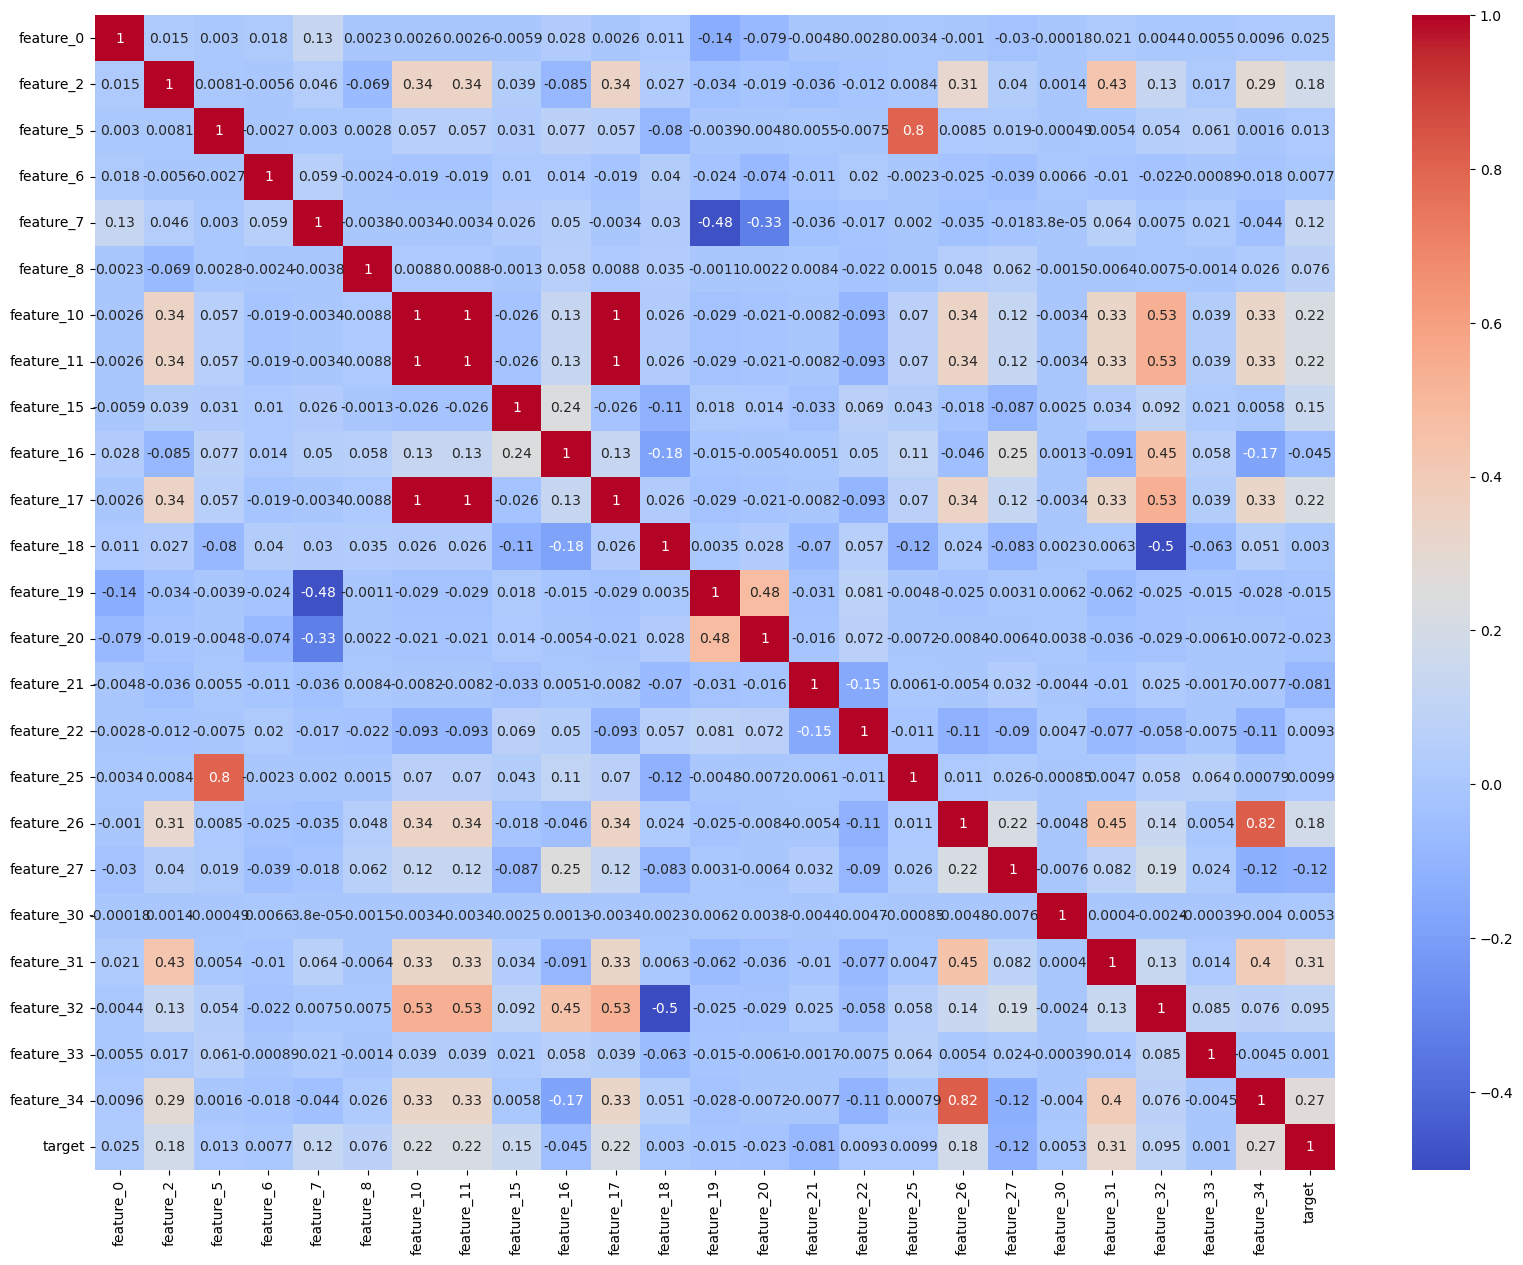

In [36]:
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(train_df.corr(), annot = True, cmap="coolwarm" )
plt.show()

In [37]:
train_df.corr()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27904\1233823885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,feature_22,feature_25,feature_26,feature_27,feature_30,feature_31,feature_32,feature_33,feature_34,target
feature_0,1.000000,0.014919,0.003008,0.018089,0.130303,0.002251,0.002591,0.002578,-0.005902,0.027808,...,-0.002752,0.003375,-0.001036,-0.030460,-0.000176,0.021451,0.004400,0.005487,0.009558,0.024799
feature_2,0.014919,1.000000,0.008142,-0.005628,0.046167,-0.068744,0.337244,0.337295,0.039254,-0.084828,...,-0.012319,0.008355,0.308243,0.039580,0.001356,0.427172,0.127178,0.016655,0.287391,0.184361
feature_5,0.003008,0.008142,1.000000,-0.002662,0.003013,0.002823,0.057226,0.057214,0.030643,0.077365,...,-0.007485,0.803196,0.008519,0.018853,-0.000493,0.005416,0.053836,0.061144,0.001648,0.012627
feature_6,0.018089,-0.005628,-0.002662,1.000000,0.058742,-0.002392,-0.019004,-0.019015,0.010082,0.013901,...,0.019892,-0.002329,-0.025053,-0.039220,0.006647,-0.010161,-0.021553,-0.000889,-0.017668,0.007732
feature_7,0.130303,0.046167,0.003013,0.058742,1.000000,-0.003750,-0.003439,-0.003442,0.026166,0.049637,...,-0.017469,0.001989,-0.035048,-0.018460,0.000038,0.064412,0.007505,0.021087,-0.043806,0.121137
feature_8,0.002251,-0.068744,0.002823,-0.002392,-0.003750,1.000000,0.008822,0.008794,-0.001341,0.058474,...,-0.021601,0.001484,0.047773,0.062060,-0.001476,-0.006383,0.007520,-0.001419,0.025661,0.075769
feature_10,0.002591,0.337244,0.057226,-0.019004,-0.003439,0.008822,1.000000,0.999995,-0.025581,0.129738,...,-0.093112,0.070291,0.341704,0.122480,-0.003385,0.327801,0.534757,0.038606,0.327808,0.215920
feature_11,0.002578,0.337295,0.057214,-0.019015,-0.003442,0.008794,0.999995,1.000000,-0.025567,0.129629,...,-0.093092,0.070274,0.341689,0.122410,-0.003384,0.327822,0.534762,0.038609,0.327840,0.215939
feature_15,-0.005902,0.039254,0.030643,0.010082,0.026166,-0.001341,-0.025581,-0.025567,1.000000,0.241610,...,0.068845,0.042812,-0.017556,-0.087332,0.002486,0.034413,0.092423,0.021023,0.005792,0.148953
feature_16,0.027808,-0.084828,0.077365,0.013901,0.049637,0.058474,0.129738,0.129629,0.241610,1.000000,...,0.050136,0.105773,-0.046266,0.250523,0.001309,-0.090805,0.446990,0.057923,-0.174579,-0.045091


In [38]:
df_train.isna().sum()

id            0
time          0
duration      0
feature_0     0
checkpoint    0
feature_1     0
feature_2     0
feature_3     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
target        0
dtype: int64

In [39]:
df_test.isna().sum()

id            0
time          0
duration      0
feature_0     0
checkpoint    0
feature_1     0
feature_2     0
feature_3     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
dtype: int64

In [40]:
df_train["feature_35"].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [41]:
df_train.shape

(419040, 41)

In [42]:
df_train.head()

,id,time,duration,feature_0,checkpoint,feature_1,feature_2,feature_3,feature_5,feature_6,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,target
0,eac9059b997a667954a1c2f19079c463,10+ years,36 months,0.0,91th week,UT,130000.0,INDIVIDUAL,0.0,0.0,...,D2,Debt consolidation,0.0,39779.0,5701.17,0.0,37400.0,Source Verified,841xx,28.0
1,f2bdbfe82b2a63a35726cb1a630af56a,10+ years,36 months,0.0,4th week,LA,50000.0,INDIVIDUAL,0.0,0.0,...,D2,Business,138.0,115674.0,11.84,0.0,49000.0,Verified,701xx,39.0
2,0a73ee5d7841b012f1fb62542d7664c7,10+ years,36 months,0.0,65th week,VA,40000.0,INDIVIDUAL,0.0,0.0,...,C1,Debt consolidation,0.0,40075.0,1689.09,0.0,17600.0,Verified,241xx,29.0
3,d9a39c969e294fe16601279e114fc9c0,< 1 year,60 months,0.0,9th week,MI,50000.0,INDIVIDUAL,0.0,0.0,...,F2,Credit card refinancing,0.0,20459.0,348.68,0.0,20100.0,Source Verified,480xx,15.0
4,3a44d3ab14792dcc7aaf391db0bdb72c,5 years,36 months,0.0,139th week,NC,45000.0,INDIVIDUAL,0.0,0.0,...,B5,debt consolidation,0.0,100987.0,2164.96,0.0,15000.0,Verified,282xx,18.0


In [43]:
y_train = df_train["target"]
X_train = df_train.drop(columns=["target"], axis=1)

In [44]:
X_test = df_test

In [45]:
ids_test = X_test["id"]

In [46]:
cols_train = X_train.columns
num_cols_train = X_train._get_numeric_data().columns
cat_cols_train = list(set(cols_train) - set(num_cols_train))
cat_cols_train

['time',
 'feature_14',
 'checkpoint',
 'feature_35',
 'feature_13',
 'feature_3',
 'feature_28',
 'feature_29',
 'feature_23',
 'feature_1',
 'feature_24',
 'duration',
 'feature_36',
 'feature_12',
 'feature_9',
 'id']

In [47]:
num_cols_train

Index(['feature_0', 'feature_2', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_10', 'feature_11', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_25', 'feature_26', 'feature_27', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34'],
      dtype='object')

In [48]:
cols_test = X_test.columns
num_cols_test = X_test._get_numeric_data().columns
cat_cols_test = list(set(cols_test) - set(num_cols_test))
cat_cols_test

['time',
 'feature_14',
 'checkpoint',
 'feature_35',
 'feature_13',
 'feature_3',
 'feature_28',
 'feature_29',
 'feature_23',
 'feature_1',
 'feature_24',
 'duration',
 'feature_36',
 'feature_12',
 'feature_9',
 'id']

In [49]:
X_train["checkpoint"].unique()

array(['91th week', '4th week', '65th week', '9th week', '139th week',
       '17th week', '113th week', '74th week', '52th week', '69th week',
       '117th week', '35th week', '43th week', '87th week', '22th week',
       '78th week', '13th week', '26th week', '61th week', '31th week',
       '100th week', '48th week', '152th week', '83th week', '39th week',
       '143th week', '82th week', '131th week', '56th week', '126th week',
       'NAth week', '44th week', '156th week', '96th week', '70th week',
       '57th week', '104th week', '144th week', '8th week', '109th week',
       '135th week', '122th week', '30th week', '95th week', '148th week',
       '130th week', '18th week', '21th week', '161th week', '169th week',
       '92th week', '108th week', '178th week', '121th week', '0th week',
       '170th week', '165th week', '174th week'], dtype=object)

In [50]:
X_train.drop(columns=["checkpoint"],  axis=1, inplace=True)

In [51]:
X_test.drop(columns=["checkpoint"],  axis=1, inplace=True)

In [52]:
cols_train = X_train.columns
num_cols_train = X_train._get_numeric_data().columns
cat_cols_train = list(set(cols_train) - set(num_cols_train))
cat_cols_train

['time',
 'feature_14',
 'feature_35',
 'feature_13',
 'feature_3',
 'feature_28',
 'feature_29',
 'feature_23',
 'feature_1',
 'feature_24',
 'duration',
 'feature_36',
 'feature_12',
 'feature_9',
 'id']

In [53]:
cols_test = X_test.columns
num_cols_test = X_test._get_numeric_data().columns
cat_cols_test = list(set(cols_test) - set(num_cols_test))
cat_cols_test

['time',
 'feature_14',
 'feature_35',
 'feature_13',
 'feature_3',
 'feature_28',
 'feature_29',
 'feature_23',
 'feature_1',
 'feature_24',
 'duration',
 'feature_36',
 'feature_12',
 'feature_9',
 'id']

In [54]:
X_train.shape

(419040, 39)

In [55]:
X_test.shape

(225637, 39)

In [56]:
for col in cat_cols_train:
    print('{}:{}'.format(col, X_train[col].unique()))
    print()

time:['10+ years' '< 1 year' '5 years' '8 years' '3 years' '1 year' '2 years'
 '9 years' '7 years' '4 years' '6 years']

feature_14:['w' 'f']

feature_35:['Source Verified' 'Verified' 'Not Verified']

feature_13:['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY']

feature_3:['INDIVIDUAL' 'JOINT']

feature_28:['D2' 'C1' 'F2' 'B5' 'C4' 'C2' 'D1' 'E1' 'B4' 'D5' 'C5' 'A3' 'C3' 'E3'
 'F1' 'D3' 'A2' 'B2' 'A5' 'B1' 'B3' 'E2' 'A1' 'G1' 'G4' 'D4' 'F5' 'A4'
 'F3' 'F4' 'G2' 'E5' 'E4' 'G3' 'G5']

feature_29:['Debt consolidation' 'Business' 'Credit card refinancing' ...
 'Refinance 36 payments' 'making changes' 'Credit card re-finance']

feature_23:['debt_consolidation' 'small_business' 'credit_card' 'home_improvement'
 'medical' 'other' 'major_purchase' 'car' 'vacation' 'house' 'moving'
 'wedding' 'renewable_energy']

feature_1:['UT' 'LA' 'VA' 'MI' 'NC' 'FL' 'AZ' 'WI' 'KY' 'CA' 'NY' 'MT' 'MN' 'MO'
 'OR' 'GA' 'TN' 'WY' 'OH' 'IN' 'TX' 'IL' 'MA' 'RI' 'NE' 'NJ' 'AL' 'OK'
 'PA' 'SC' 'MD' 'WA' 'NH' 'NV' 'CT'

In [57]:
for col in cat_cols_test:
    print('{}:{}'.format(col, X_test[col].unique()))
    print()

time:['6 years' '5 years' '10+ years' '1 year' '8 years' '2 years' '7 years'
 '4 years' '3 years' '< 1 year' '9 years']

feature_14:['w' 'f']

feature_35:['Not Verified' 'Source Verified' 'Verified']

feature_13:['RENT' 'MORTGAGE' 'OWN' 'NONE' 'OTHER' 'ANY']

feature_3:['INDIVIDUAL' 'JOINT']

feature_28:['C4' 'A2' 'A5' 'B5' 'B2' 'F1' 'B3' 'C2' 'E5' 'A4' 'G2' 'F3' 'B4' 'A1'
 'D3' 'D5' 'C3' 'E1' 'D4' 'B1' 'C1' 'D1' 'A3' 'C5' 'G1' 'E2' 'E3' 'D2'
 'F5' 'E4' 'F4' 'F2' 'G5' 'G3' 'G4']

feature_29:['Credit card refinancing' 'Debt consolidation' 'Home improvement' ...
 'Stepping Stone' 'Taxes and Vacation' 'Digging out']

feature_23:['credit_card' 'debt_consolidation' 'home_improvement' 'other'
 'major_purchase' 'small_business' 'wedding' 'car' 'vacation' 'moving'
 'house' 'medical' 'renewable_energy' 'educational']

feature_1:['CA' 'WI' 'NY' 'OH' 'PA' 'HI' 'NV' 'VA' 'AZ' 'UT' 'TN' 'MT' 'MD' 'MI'
 'MN' 'CO' 'LA' 'MO' 'GA' 'TX' 'NM' 'KS' 'AL' 'WV' 'NJ' 'FL' 'MA' 'IL'
 'OR' 'NC' 'OK' 'CT' 'WA' '

id:['2183e7e6f5901c2fe2bc14ca6d43a6fa' 'a495f8f7ec5a034c6db1405b40c7f473'
 'c57ccaed44245b3b7eaa76c5ec99a0ea' ... '11b58c759028d0b32695224533b47e5b'
 'd1cff3f77d9bce11001f3c7a93a9a2c2' '914ec7ff363841226bd69e9c256f3554']



In [58]:
X_train["duration"].unique()

array(['36 months', '60 months'], dtype=object)

In [59]:
#X_train[df_train["feature_35"] == "Not Verified"]

In [60]:
X_train.drop(columns=["id", "feature_12", "feature_14", "feature_24", "feature_28", "feature_29", "feature_35", "feature_36", "time"], axis = 1, inplace=True)

In [61]:
X_test.drop(columns=["id", "feature_12", "feature_14", "feature_24", "feature_28", "feature_29", "feature_36", "feature_35", "feature_36", "time"], axis = 1, inplace=True)

In [62]:
X_train.drop(columns=["feature_1"], axis = 1, inplace=True)

In [63]:
X_train.drop(columns=["feature_9"], axis = 1, inplace=True)

In [64]:
X_test.drop(columns=["feature_1", "feature_9"], axis=1, inplace=True)

In [65]:
cols_train = X_train.columns
num_cols_train = X_train._get_numeric_data().columns
cat_cols_train = list(set(cols_train) - set(num_cols_train))
cat_cols_train


['feature_3', 'feature_23', 'feature_13', 'duration']

In [66]:
cols_test = X_test.columns
num_cols_test = X_test._get_numeric_data().columns
cat_cols_test = list(set(cols_test) - set(num_cols_test))
cat_cols_test

['feature_3', 'feature_23', 'feature_13', 'duration']

In [67]:
X_train.columns

Index(['duration', 'feature_0', 'feature_2', 'feature_3', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_10', 'feature_11',
       'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_25', 'feature_26', 'feature_27', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34'],
      dtype='object')

In [68]:
X_test.columns

Index(['duration', 'feature_0', 'feature_2', 'feature_3', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_10', 'feature_11',
       'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_18',
       'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
       'feature_25', 'feature_26', 'feature_27', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34'],
      dtype='object')

In [71]:
combined_df = pd.concat([X_train, X_test], axis=0)

In [72]:
cols = combined_df.columns
num_cols = combined_df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['feature_3', 'feature_23', 'feature_13', 'duration']

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_stand = combined_df.copy()

for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(df_stand[[i]])
    
    # transform the training data column
    df_stand[i] = scale.transform(df_stand[[i]])

In [74]:
def convert_categorical_cols(df, col):
    print(col)
    for col_name in col:
        converted_cols = pd.get_dummies(df[col_name], drop_first=True)
        df = pd.concat([df, converted_cols], axis=1)
        df.drop(columns=[col_name], inplace=True)
    return df

In [75]:
df_dummy_combined = convert_categorical_cols(df_stand, cat_cols)

['feature_3', 'feature_23', 'feature_13', 'duration']


In [76]:
df_dummy_combined.head()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,NONE,OTHER,OWN,RENT,60 months
0,-0.067644,0.824910,-0.081076,-0.111513,-0.371245,0.020507,1.182950,1.184166,3.475635,0.968689,...,0,0,0,0,0,0,0,0,1,0
1,-0.067644,-0.387490,-0.081076,-0.111513,3.020569,0.443138,-1.184738,-1.184457,2.431923,0.737278,...,0,1,0,0,0,0,0,0,1,0
2,-0.067644,-0.539040,-0.081076,-0.111513,-0.371245,0.481653,-0.296855,-0.296223,-0.699215,-0.070393,...,0,0,0,0,1,0,0,0,0,0
3,-0.067644,-0.387490,-0.081076,-0.111513,0.759360,-0.012872,0.709413,0.704520,2.431923,2.198345,...,0,0,0,0,0,0,0,1,0,1
4,-0.067644,-0.463265,-0.081076,-0.111513,-0.371245,-0.266040,-0.652008,-0.651517,-0.699215,0.179168,...,0,0,0,0,1,0,0,0,0,0


In [77]:
X_train = df_dummy_combined.iloc[:df_train.shape[0], :]

In [79]:
X_test = df_dummy_combined.iloc[df_train.shape[0]:, :]

In [80]:
X_train.head()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,NONE,OTHER,OWN,RENT,60 months
0,-0.067644,0.824910,-0.081076,-0.111513,-0.371245,0.020507,1.182950,1.184166,3.475635,0.968689,...,0,0,0,0,0,0,0,0,1,0
1,-0.067644,-0.387490,-0.081076,-0.111513,3.020569,0.443138,-1.184738,-1.184457,2.431923,0.737278,...,0,1,0,0,0,0,0,0,1,0
2,-0.067644,-0.539040,-0.081076,-0.111513,-0.371245,0.481653,-0.296855,-0.296223,-0.699215,-0.070393,...,0,0,0,0,1,0,0,0,0,0
3,-0.067644,-0.387490,-0.081076,-0.111513,0.759360,-0.012872,0.709413,0.704520,2.431923,2.198345,...,0,0,0,0,0,0,0,1,0,1
4,-0.067644,-0.463265,-0.081076,-0.111513,-0.371245,-0.266040,-0.652008,-0.651517,-0.699215,0.179168,...,0,0,0,0,1,0,0,0,0,0


In [81]:
X_test.head()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,NONE,OTHER,OWN,RENT,60 months
0,-0.067644,-0.508730,-0.081076,-0.111513,1.889964,0.629034,-0.592816,-0.592301,0.344497,0.156481,...,0,0,0,0,0,0,0,0,1,0
1,-0.067644,-0.357180,-0.081076,-0.111513,-0.371245,-0.237282,0.496321,0.497265,-0.699215,-1.545073,...,0,0,0,0,1,0,0,0,0,0
2,-0.067644,0.749135,-0.081076,-0.111513,-0.371245,-0.536667,1.182950,1.184166,-0.699215,-1.227450,...,0,0,0,0,1,0,0,0,0,0
3,-0.067644,0.094924,-0.081076,-0.111513,0.759360,0.478058,-0.356047,-0.355439,1.388210,-0.410704,...,0,0,0,0,1,0,0,0,0,0
4,-0.067644,0.294485,-0.081076,-0.111513,-0.371245,-0.232147,1.774872,1.776321,-0.699215,-0.937051,...,0,0,0,0,1,0,0,0,0,0


In [82]:
X_train.shape

(419040, 44)

In [83]:
X_test.shape

(225637, 44)

In [84]:
X_train.rename(columns={'60 months': 'Sixty_months'}, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27904\1724307680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.rename(columns={'60 months': 'Sixty_months'}, inplace=True)


In [85]:
X_test.rename(columns={'60 months': 'Sixty_months'}, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27904\2115706600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.rename(columns={'60 months': 'Sixty_months'}, inplace=True)


In [86]:
# X_train.drop(columns=cat_cols_train, axis=1, inplace=True)

In [87]:
X_train.head()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,NONE,OTHER,OWN,RENT,Sixty_months
0,-0.067644,0.824910,-0.081076,-0.111513,-0.371245,0.020507,1.182950,1.184166,3.475635,0.968689,...,0,0,0,0,0,0,0,0,1,0
1,-0.067644,-0.387490,-0.081076,-0.111513,3.020569,0.443138,-1.184738,-1.184457,2.431923,0.737278,...,0,1,0,0,0,0,0,0,1,0
2,-0.067644,-0.539040,-0.081076,-0.111513,-0.371245,0.481653,-0.296855,-0.296223,-0.699215,-0.070393,...,0,0,0,0,1,0,0,0,0,0
3,-0.067644,-0.387490,-0.081076,-0.111513,0.759360,-0.012872,0.709413,0.704520,2.431923,2.198345,...,0,0,0,0,0,0,0,1,0,1
4,-0.067644,-0.463265,-0.081076,-0.111513,-0.371245,-0.266040,-0.652008,-0.651517,-0.699215,0.179168,...,0,0,0,0,1,0,0,0,0,0


In [88]:
X_test.head()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,NONE,OTHER,OWN,RENT,Sixty_months
0,-0.067644,-0.508730,-0.081076,-0.111513,1.889964,0.629034,-0.592816,-0.592301,0.344497,0.156481,...,0,0,0,0,0,0,0,0,1,0
1,-0.067644,-0.357180,-0.081076,-0.111513,-0.371245,-0.237282,0.496321,0.497265,-0.699215,-1.545073,...,0,0,0,0,1,0,0,0,0,0
2,-0.067644,0.749135,-0.081076,-0.111513,-0.371245,-0.536667,1.182950,1.184166,-0.699215,-1.227450,...,0,0,0,0,1,0,0,0,0,0
3,-0.067644,0.094924,-0.081076,-0.111513,0.759360,0.478058,-0.356047,-0.355439,1.388210,-0.410704,...,0,0,0,0,1,0,0,0,0,0
4,-0.067644,0.294485,-0.081076,-0.111513,-0.371245,-0.232147,1.774872,1.776321,-0.699215,-0.937051,...,0,0,0,0,1,0,0,0,0,0


In [89]:
print(X_train.shape)

(419040, 44)


In [90]:
print(X_test.shape)

(225637, 44)


In [91]:
'target' in X_train.columns

False

In [92]:
print(y_train.shape)

(419040,)


In [93]:
params = {
    'learning_rate':[0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_depth':[3, 5, 7, 9, 11],
    'min_child_weight':[1, 3, 5],
    'gamma':[0.0, 0.1, 0.2, 0.3],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]
}

In [94]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import datetime

In [95]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds'%(thour, tmin, round(tsec,2)))
    
print(X_train.shape)
print(y_train.shape)

(419040, 44)
(419040,)


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [97]:
X_train.shape
X_val.shape

(138284, 44)

In [98]:
X_train.head()

,feature_0,feature_2,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_15,feature_16,...,renewable_energy,small_business,vacation,wedding,MORTGAGE,NONE,OTHER,OWN,RENT,Sixty_months
298545,-0.067644,-0.387490,-0.081076,-0.111513,-0.371245,0.863715,-0.569139,-0.568615,-0.699215,1.034482,...,0,0,0,0,0,0,0,0,1,1
320007,-0.067644,0.036850,-0.081076,-0.111513,-0.371245,0.033345,-0.592816,-0.607105,0.344497,0.306217,...,0,0,0,0,0,0,0,0,1,0
99624,-0.067644,-0.129855,-0.081076,-0.111513,-0.371245,-0.333825,0.354259,0.355148,-0.699215,-1.454324,...,0,0,0,0,0,0,0,0,1,0
305088,-0.067644,0.446035,-0.081076,-0.111513,-0.371245,0.456490,-0.036409,-0.035675,2.431923,1.411093,...,0,0,0,0,1,0,0,0,0,1
239482,-0.067644,0.370260,-0.081076,-0.111513,0.759360,-0.419583,1.064566,1.065735,0.344497,-0.998307,...,0,0,0,0,1,0,0,0,0,0


In [99]:
xgb_regressor = xgboost.XGBRegressor(reg_alpha=0.4, reg_lambda=0.7) #reg_alpha=0.4, reg_lambda=0.7

In [100]:
rf_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=params, n_iter=5, 
                               scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)

In [101]:
X_train.columns

Index(['feature_0', 'feature_2', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_10', 'feature_11', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_25', 'feature_26', 'feature_27', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'JOINT',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT', 'Sixty_months'],
      dtype='object')

In [102]:
from datetime import datetime
start_time = timer(None)
rf_search.fit(X_train, y_train)
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 5 minutes and 36.03 seconds


In [103]:
X_train.columns

Index(['feature_0', 'feature_2', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_10', 'feature_11', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_25', 'feature_26', 'feature_27', 'feature_30',
       'feature_31', 'feature_32', 'feature_33', 'feature_34', 'JOINT',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'MORTGAGE',
       'NONE', 'OTHER', 'OWN', 'RENT', 'Sixty_months'],
      dtype='object')

In [104]:
best_params = rf_search.best_params_

In [105]:
xgb_regressor = xgboost.XGBRegressor(**best_params)

In [106]:
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [107]:
from sklearn.metrics import mean_squared_log_error

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Mean Squared Log Error: {:0.4f}'.format(mean_squared_log_error(test_labels, predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


random_accuracy = evaluate(xgb_regressor, X_val, y_val)

Model Performance
Mean Squared Log Error: 0.1248
Accuracy = 66.82%.


In [108]:
random_accuracy = evaluate(xgb_regressor, X_train, y_train)

Model Performance
Mean Squared Log Error: 0.1206
Accuracy = 67.47%.


In [109]:
y_pred = xgb_regressor.predict(X_test)

In [110]:
ids_test

0         2183e7e6f5901c2fe2bc14ca6d43a6fa
1         a495f8f7ec5a034c6db1405b40c7f473
2         c57ccaed44245b3b7eaa76c5ec99a0ea
3         f19d65cf813f5ddbdefa6075278c1d41
4         5aaec38f837a17c42fab041c2c6b5a4f
                        ...               
225632    c2d12c317da392b4c805a5267accf5bf
225633    ce24f3311881d184c48c4ed2d7be96c1
225634    11b58c759028d0b32695224533b47e5b
225635    d1cff3f77d9bce11001f3c7a93a9a2c2
225636    914ec7ff363841226bd69e9c256f3554
Name: id, Length: 225637, dtype: object

In [111]:
submission_2 = pd.DataFrame({'id': ids_test.values, 'target': y_pred})

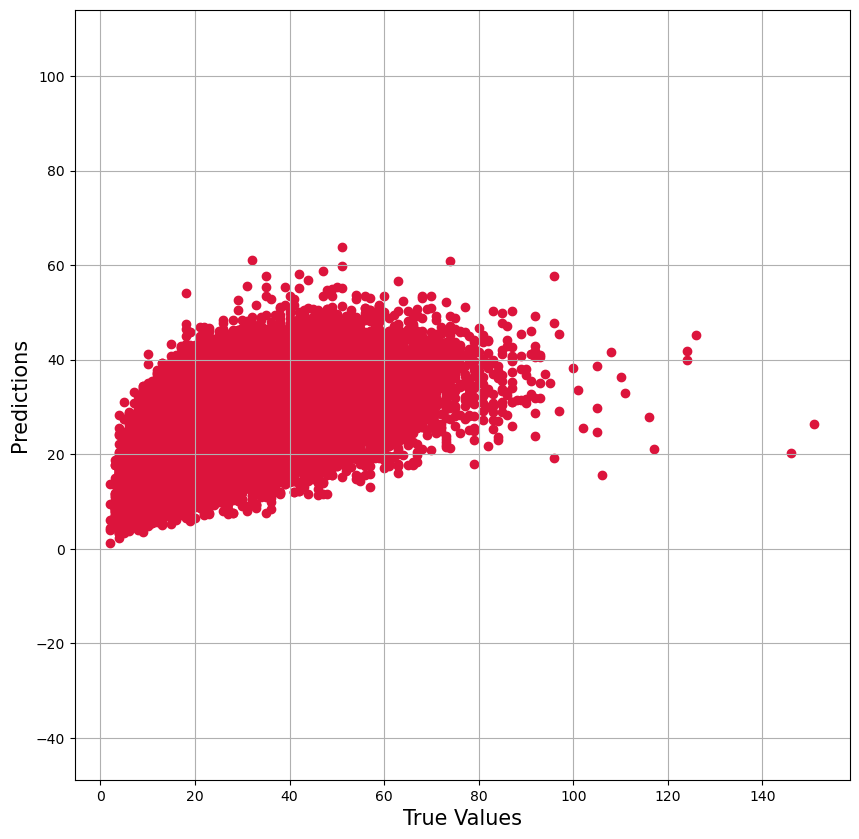

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(y_val, xgb_regressor.predict(X_val), c='crimson')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.grid()
plt.show()

In [113]:
submission_2

,id,target
0,2183e7e6f5901c2fe2bc14ca6d43a6fa,26.824011
1,a495f8f7ec5a034c6db1405b40c7f473,28.013763
2,c57ccaed44245b3b7eaa76c5ec99a0ea,25.910536
3,f19d65cf813f5ddbdefa6075278c1d41,42.815628
4,5aaec38f837a17c42fab041c2c6b5a4f,32.085243
...,...,...
225632,c2d12c317da392b4c805a5267accf5bf,24.733582
225633,ce24f3311881d184c48c4ed2d7be96c1,27.756472
225634,11b58c759028d0b32695224533b47e5b,24.725073
225635,d1cff3f77d9bce11001f3c7a93a9a2c2,25.811760


In [114]:
submission_2.to_csv('xgb_submission.csv', index=False)